In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score


In [3]:
data=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\current_excelr_lms\logistic_regression_assignment\bank-full.csv")


data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#some of the encoder can not able to create realtion ship with categorical type target , so here i m using custom fuction to make the 
#the target as integer 
#target is labeled as integer then no need to do this transformation 

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(data,  variable, ordinal_mapping):

    data[variable] = data[variable].map(ordinal_mapping)


#(if target is not categorical then no need to execute )

In [5]:
for variable in ['y']:
    mappings = find_category_mappings(data, variable)
    integer_encode(data, variable, mappings)
    
#(if target is not categorical then no need execute this) 

In [6]:
# let's check for missing data

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='y', axis=1),  # predictors
    data['y'],  # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((31647, 16), (13564, 16))

In [8]:
# Let's replace null values in numerical variables by the mean


def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)


#impute_na(X_test, 'age', X_train['age'].mean())
#impute_na(X_train, 'age',  X_train['age'].mean())
# note how I impute first the test set, this way the value of
# the median used will be the same for both train and test

In [9]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24951,58,management,married,primary,no,1021,no,no,unknown,18,nov,205,1,-1,0,unknown
22129,55,blue-collar,married,unknown,no,196,no,no,cellular,21,aug,168,2,-1,0,unknown
986,50,admin.,married,secondary,no,159,yes,no,unknown,7,may,216,2,-1,0,unknown
14999,43,management,married,primary,no,1880,yes,no,cellular,17,jul,63,6,-1,0,unknown
4027,53,technician,divorced,tertiary,no,647,yes,no,unknown,16,may,512,6,-1,0,unknown


In [10]:
# let's check that we have no missing data after NA imputation

X_train.isnull().sum(), X_test.isnull().sum()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 dtype: int64)

### one hot encoder  

In [11]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [12]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables=['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'], # we can select which variables to encode
    drop_last=True) # to return k-1, false to return k


ohe_enc.fit(X_train)

OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                         variables=['job', 'marital', 'education', 'default',
                                    'housing', 'loan', 'contact', 'month',
                                    'poutcome'])

In [13]:
#ohe_enc.variables

In [14]:
X_train_OHE = ohe_enc.transform(X_train)
X_test_OHE = ohe_enc.transform(X_test)

#X_train_OHE.head()

### count encoding  

In [15]:
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder

In [16]:
count_enc = CountFrequencyCategoricalEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'])

count_enc.fit(X_train)

CountFrequencyCategoricalEncoder(encoding_method='count',
                                 variables=['job', 'marital', 'education',
                                            'default', 'housing', 'loan',
                                            'contact', 'month', 'poutcome'])

In [17]:
X_train_count = count_enc.transform(X_train)
X_test_count = count_enc.transform(X_test)

# let's explore the result
#X_train_count.head()

### ordered integer encoding  

In [18]:
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [19]:
ordinal_enc = OrdinalCategoricalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'])

In [20]:
ordinal_enc.fit(X_train, y_train)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['job', 'marital', 'education', 'default',
                                     'housing', 'loan', 'contact', 'month',
                                     'poutcome'])

In [21]:
X_train_ordered = ordinal_enc.transform(X_train)
X_test_ordered = ordinal_enc.transform(X_test)


#### mean encoding  

In [22]:
from feature_engine.categorical_encoders import MeanCategoricalEncoder

In [23]:
mean_enc = MeanCategoricalEncoder(
    variables=['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'])

In [24]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'poutcome'])

In [25]:
X_train_mean = mean_enc.transform(X_train)
X_test_mean = mean_enc.transform(X_test)

# let's explore the result
#X_train_mean.head()

#### probabilty ratio encoding  

In [26]:
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [27]:
ratio_enc = WoERatioCategoricalEncoder(
    encoding_method = 'ratio',
    variables=['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'])

In [28]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ratio_enc.fit(X_train, y_train)

WoERatioCategoricalEncoder(encoding_method='ratio',
                           variables=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'])

In [29]:
X_train_prob = ratio_enc.transform(X_train)
X_test_prob = ratio_enc.transform(X_test)

# let's explore the result
#X_train_prob.head()

#### weight of evidence encoding  

In [30]:
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [31]:
woe_enc = WoERatioCategoricalEncoder(
    encoding_method = 'woe',
    variables=['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'])

In [32]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train, y_train)

WoERatioCategoricalEncoder(encoding_method='woe',
                           variables=['job', 'marital', 'education', 'default',
                                      'housing', 'loan', 'contact', 'month',
                                      'poutcome'])

In [33]:
X_train_woe = woe_enc.transform(X_train)
X_test_woe = woe_enc.transform(X_test)

# let's explore the result
#X_train_woe.head()

## Random Forest Performance

In [34]:
# create a function to build random forests and compare performance in train and test set


def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=50, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [35]:
# OHE
run_randomForests(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Random Forests roc-auc: 0.8918504214021095
Test set
Random Forests roc-auc: 0.8853752025543522


In [36]:
# counts
run_randomForests(X_train_count, X_test_count, y_train, y_test)

Train set
Random Forests roc-auc: 0.8925055304469132
Test set
Random Forests roc-auc: 0.8837407817635474


In [37]:
# ordered labels
run_randomForests(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Random Forests roc-auc: 0.8951472627181007
Test set
Random Forests roc-auc: 0.8863546135772377


In [38]:
# mean encoding
run_randomForests(X_train_mean, X_test_mean, y_train, y_test)

Train set
Random Forests roc-auc: 0.8951472917714323
Test set
Random Forests roc-auc: 0.8863548754868573


In [39]:
# woe
run_randomForests(X_train_woe, X_test_woe, y_train, y_test)

Train set
Random Forests roc-auc: 0.8951472917714323
Test set
Random Forests roc-auc: 0.8863548754868573


so above 3 are creted monotonic relationship with target variable so all 3 have same roc-auc value 

## logistic reggression  

In [40]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [41]:
# OHE
run_logistic(X_train_OHE, X_test_OHE, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8482198665479767
Test set
Logistic Regression roc-auc: 0.8321149385127882


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# counts
run_logistic(X_train_count, X_test_count, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8802969912892883
Test set
Logistic Regression roc-auc: 0.8695327087138118


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
# ordered labels
run_logistic(X_train_ordered, X_test_ordered, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8142765591659183
Test set
Logistic Regression roc-auc: 0.7981329510849736


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
# mean encoding
run_logistic(X_train_mean, X_test_mean, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7692141350810631
Test set
Logistic Regression roc-auc: 0.7519537802855916


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
# woe
run_logistic(X_train_woe, X_test_woe, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8926791337869308
Test set
Logistic Regression roc-auc: 0.8853987744201255


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
#so here we can conclude that for logistic regression woe is giving best roc-auc values 

# -------------------------gaussian transformtion----------------------------------------------------

In [47]:
import scipy.stats as stats
from feature_engine import variable_transformers as vt
import matplotlib.pyplot as plt


In [48]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

#### since WOE has given best performence for logistic regression so i m usnig that for variable  gaussian transformation 

In [49]:
#X_train_woe
#X_test_woe
#y_train
#y_test

In [50]:
numericals=['age','balance','day','duration','campaign','pdays','previous'] #these are the numerical columns before encodings
categorical=['job','marital','education','default','housing','loan','contact','month','poutcome'] #here are the categorical columns before encoding

In [51]:
#here i m checking for the normality of numerical values before encoding i applied , non of the numerical variable is normaly distributed 
#for i in numericals:
#    diagnostic_plots(X_train_woe, i)


In [52]:
#here i m checking for narmality of categorical values before encoding i applied 
#for i in categorical:
#    diagnostic_plots(X_train_woe, i)



#### yeo johnson transformation  

In [53]:
#here i have performed transformation on numerical varaible of the train data set only 
yjt = vt.YeoJohnsonTransformer(variables = numericals)
yjt.fit(X_train_woe)


YeoJohnsonTransformer(variables=['age', 'balance', 'day', 'duration',
                                 'campaign', 'pdays', 'previous'])

In [54]:
#yjt.lambda_dict_

In [55]:
X_train_woe_with_numerical = yjt.transform(X_train_woe)
X_test_woe_with_numerical=yjt.transform(X_test_woe)

In [56]:
#here i m checking for the normality of numerical variables before encoding i applied , after gaussian transformation on test data
#for i in numericals:
#    diagnostic_plots(X_test_woe_with_numerical, i)


In [57]:
#here i have performed transformation on all the  varaible of the train data set only 
yjt = vt.YeoJohnsonTransformer()
yjt.fit(X_train_woe)


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\scipy\optimize\optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


YeoJohnsonTransformer(variables=['age', 'job', 'marital', 'education',
                                 'default', 'balance', 'housing', 'loan',
                                 'contact', 'day', 'month', 'duration',
                                 'campaign', 'pdays', 'previous', 'poutcome'])

In [58]:
X_train_woe_with_entire_train_data = yjt.transform(X_train_woe)
X_test_woe_with_entire_train_data=yjt.transform(X_test_woe)

In [59]:
#now we will run the random forest algo for numerical transformation only

In [60]:
run_randomForests(X_train_woe_with_numerical,X_test_woe_with_numerical , y_train, y_test)

Train set
Random Forests roc-auc: 0.8951460957426197
Test set
Random Forests roc-auc: 0.8863552945422488


#### if we see the random forest result on woe coded data set with and without transformation on numerical  then no any gain is visible  

In [61]:
#now we will run the random forest algo for entire train data gaussioan tranformation only
run_randomForests(X_train_woe_with_entire_train_data,X_test_woe_with_entire_train_data, y_train, y_test)

Train set
Random Forests roc-auc: 0.891917403857829
Test set
Random Forests roc-auc: 0.8834538073932372


#### if we see the random forest result on woe coded data set with and without transformation on entire data set  then roc_auc value decreses 

In [62]:
# now we will run the losgistic regression algo for numerical variable  transformation only
run_logistic(X_train_woe_with_numerical,X_test_woe_with_numerical , y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9070571626814762
Test set
Logistic Regression roc-auc: 0.8967613042156186


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
#now we will run the logistic  algo for entire train data gaussioan tranformation only
run_logistic(X_train_woe_with_entire_train_data,X_test_woe_with_entire_train_data, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7407570457573119
Test set
Logistic Regression roc-auc: 0.7389402770113284


#### so we can conclude that tranformation blindely on entire data rather than only numerical some times gives major diffrences  

# -------------------------------descritisation(next)--------------------------------------------------

#### here i m performing two types descritisation one is supervised and other is unsupervised  
#### in supervised i m taking equal width descritisation (useful tree based model genrally but we should analyse before blindely applying)
#### in unsupervised i m taking decision tree descritisation (useful for regression types generally but we should analyse before blindely applying  )

In [64]:
X_train_GT=X_train_woe_with_numerical.copy()#GT stands for after Gaussian transformation 
X_test_GT=X_test_woe_with_numerical.copy()

In [65]:
#X_train_GT
#X_test_GT
#y_train
#y_test

### equal width decritisation  

In [66]:
from feature_engine.discretisers import EqualWidthDiscretiser

In [67]:
#here i m performing discretisation for only numericals columns

disc = EqualWidthDiscretiser(bins=10, variables = numericals)

disc.fit(X_train_GT)

EqualWidthDiscretiser(bins=10, return_object=False,
                      variables=['age', 'balance', 'day', 'duration',
                                 'campaign', 'pdays', 'previous'])

In [68]:
#disc.binner_dict_

In [69]:
# transform train and text

X_train_GT_des = disc.transform(X_train_GT)
X_test_GT_des = disc.transform(X_test_GT)

In [70]:
#X_train_GT_des.head()

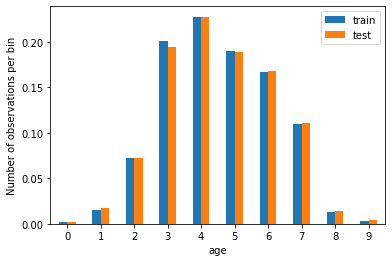

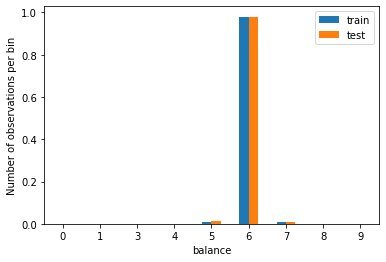

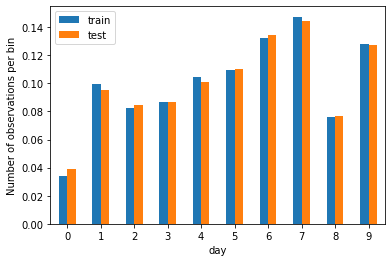

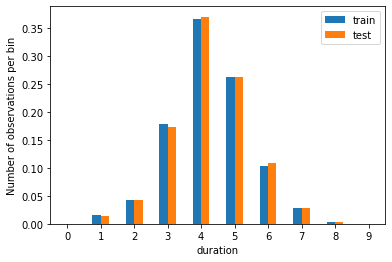

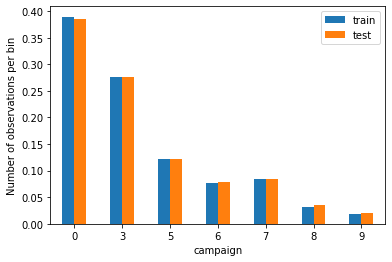

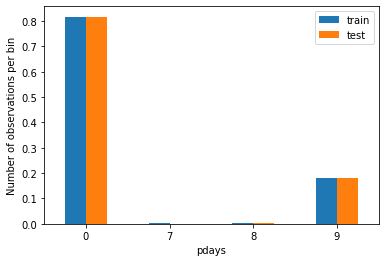

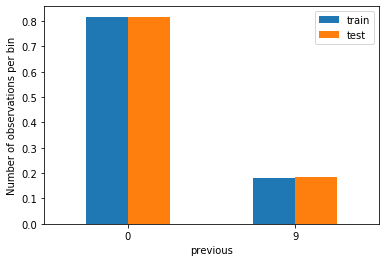

In [71]:
for i in numericals:
    t1 = X_train_GT_des.groupby([i])[i].count() / len(X_train_GT_des)
    t2 = X_test_GT_des.groupby([i])[i].count() / len(X_test_GT_des)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

#### descretisation with decision tree 

In [72]:
from feature_engine.discretisers import DecisionTreeDiscretiser

In [73]:
#set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=10, scoring='accuracy',
                                   variables=numericals,
                                   regression=False,
                                   param_grid={'max_depth': [1, 2, 3],
                                              'min_samples_leaf':[10,4]})

treeDisc.fit(X_train_GT, y_train)

DecisionTreeDiscretiser(cv=10,
                        param_grid={'max_depth': [1, 2, 3],
                                    'min_samples_leaf': [10, 4]},
                        random_state=None, regression=False, scoring='accuracy',
                        variables=['age', 'balance', 'day', 'duration',
                                   'campaign', 'pdays', 'previous'])

In [74]:
# we can inspect the tree for each numerical variables
for i in numericals:
    treeDisc.binner_dict_[i].best_params_

In [75]:
# we can inspect the tree for age
treeDisc.binner_dict_['duration'].best_params_  #similarly we can check for all the variables one by one 

{'max_depth': 3, 'min_samples_leaf': 10}

In [76]:
# let's transform the data

X_train_GT_des_t = treeDisc.transform(X_train_GT)
X_test_GT_des_t = treeDisc.transform(X_test_GT)

In [77]:
#X_train_GT_des_t.head()

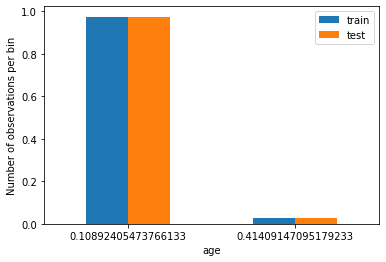

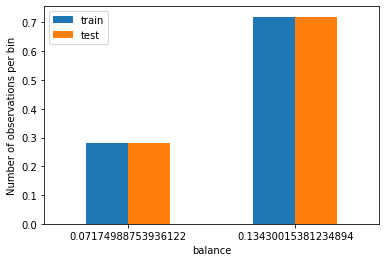

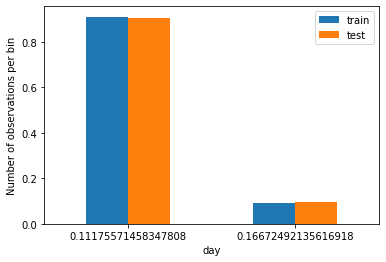

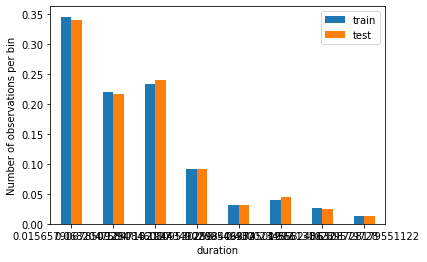

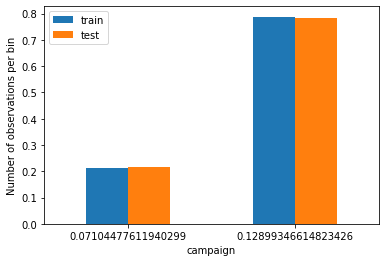

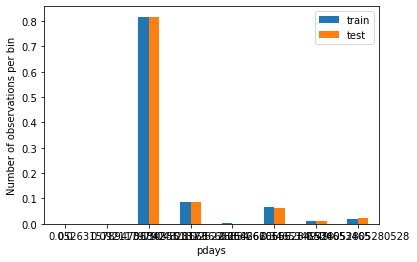

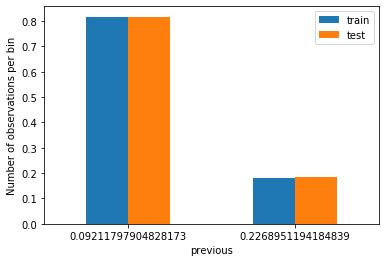

In [78]:
for i in numericals:
    t1 = X_train_GT_des_t.groupby([i])[i].count() / len(X_train_GT_des_t)
    t2 = X_test_GT_des_t.groupby([i])[i].count() / len(X_test_GT_des_t)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

## now checking performence for equal width descritisation and descision tree descritisation by both random forest 

In [79]:
#random forest with euql descritisation 
run_randomForests(X_train_GT_des,X_test_GT_des, y_train, y_test)

Train set
Random Forests roc-auc: 0.8901088533422885
Test set
Random Forests roc-auc: 0.882443988663504


In [80]:
#random forest with descision tree descritisation 
run_randomForests(X_train_GT_des_t,X_test_GT_des_t, y_train, y_test)

Train set
Random Forests roc-auc: 0.8943481895736077
Test set
Random Forests roc-auc: 0.8849274156775432


#### so we can conclude that tree based algorithm working with  decision tree descritisation 

## now checking performence for equal width descritisation and descision tree descritisation by both logistic reggression

In [81]:
#logistic with euql descritisation 
run_logistic(X_train_GT_des,X_test_GT_des, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9021968938076136
Test set
Logistic Regression roc-auc: 0.8918891043241016


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
#logistic with decision tree descritisation 
run_logistic(X_train_GT_des_t,X_test_GT_des_t, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8890191694074773
Test set
Logistic Regression roc-auc: 0.8792496341777387


#### so here we can conclude that that logistic reggression (non tree based algo is working fine with equal descritisation ) 

#### we will keep it in our mind after descritisation our models perfomence has down little compare to before descritisation , so from here we will go for two branch (1.with descritisation , 2. without descritisation ) 

# -----------------------------------------scaling(next)------------------------------------------------

#### we donot need of scaling preprocessing on tree based algorithm so we i m performing here scaling for logistic reggression only 

In [85]:
X_train_GT_des_eq=X_train_GT_des.copy()
X_test_GT_des_eq=X_test_GT_des.copy()     #for equal dins descritization 
#X_train_GT_des_t
#X_test_GT_des_t          #for descritisation with decision tree descritization 
#y_train
#y_test

In [86]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

#### here i m performing standarization on equal bin descritized data  

In [87]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_GT_des_eq)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
X_train_GT_eq_scaled = scaler.transform(X_train_GT_des_eq)
X_test_GT_eq_scaled = scaler.transform(X_test_GT_des_eq)

###### now i will perform both random forest and logistic regg on this data  

In [89]:
#random forest with euql descritisation in succession scaling
run_randomForests(X_train_GT_eq_scaled,X_test_GT_eq_scaled, y_train, y_test)

Train set
Random Forests roc-auc: 0.8901088533422885
Test set
Random Forests roc-auc: 0.882443988663504


In [90]:
#logistic regg with euql descritisation in succession scaling
run_logistic(X_train_GT_eq_scaled,X_test_GT_eq_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9028390886465759
Test set
Logistic Regression roc-auc: 0.8921490234306966


#### here , i m performing  standarization on decision tree descritization 

In [91]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_GT_des_t)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
X_train_GT_t_scaled = scaler.transform(X_train_GT_des_t)
X_test_GT_t_scaled = scaler.transform(X_test_GT_des_t)

#### here i m performing standarization on decsion tree descritized data  and checking impact on logistic and random forest algo

In [93]:
#random forest with euql descritisation in succession scaling
run_randomForests(X_train_GT_t_scaled,X_test_GT_t_scaled, y_train, y_test)

Train set
Random Forests roc-auc: 0.8943481895736077
Test set
Random Forests roc-auc: 0.8849274156775432


In [94]:
#logistic regg with euql descritisation in succession scaling
run_logistic(X_train_GT_t_scaled,X_test_GT_t_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9117485881194614
Test set
Logistic Regression roc-auc: 0.8990526205236045


###### so from here we can conclude that random forest have no impact of scaling but logistic reggression have great impact 

## since i have seen that after performig descritisation performence of both logistic and random forest roc_auc values droped .so, here i m trying to standarized without descritisation data and check the performence by logistic and random forest algo 

In [96]:
#X_train_GT
#X_test_GT
#y_train
#y_test

In [97]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_GT)

StandardScaler(copy=True, with_mean=True, with_std=True)

###### here , i m performing scaling on data without descritisation 

In [98]:
X_train_GT_scaled = scaler.transform(X_train_GT)
X_test_GT_scaled = scaler.transform(X_test_GT)

In [99]:
#random forest without descritisation in succession scaling
run_randomForests(X_train_GT_scaled,X_test_GT_scaled, y_train, y_test)

Train set
Random Forests roc-auc: 0.8951460957426197
Test set
Random Forests roc-auc: 0.8863552945422488


In [100]:
#logistic regg without descritisation in succession scaling
run_logistic(X_train_GT_scaled,X_test_GT_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9091345533576152
Test set
Logistic Regression roc-auc: 0.898601690731359


.

.